## Машинное обучение, ФКН ВШЭ

## Практическое задание 3

### Общая информация
Дата выдачи: 22.09.2018

Мягкий дедлайн: 7:59MSK 02.10.2018

Жесткий дедлайн: 23:59MSK 03.10.2018

### О задании

Задание состоит из двух частей: в **первой** части вы научитесь применять готовые модели из `sklearn` на данных и исследуете особенности разных видов регуляризации; во **второй** части вы реализуете собственный класс линейной регрессии для нестандартной функции потерь (включая процесс обучения) и исследуете скорость сходимости различных градиентных методов для этой модели.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Присылать необходимо ноутбук с выполненным заданием. Часть задания сдаётся в Яндекс.Контест. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df=pd.read_csv('homework-practice-03-data.csv')

In [0]:
for i in range(0,7):
    df['f%s' % i ] = (df['f%s' % i ] - df['f%s' % i].mean()) / df['f%s' % i].var()

In [0]:
train = df.sample(frac=0.8,random_state=42)
df.drop(index=train.index, inplace= True)
test = df

In [0]:
train_y = train['f1'];
test_y = test['f1'];

#### 2. [0.5 балла] В качестве целевой переменной для задачи регрессии будем использовать значения признака f1. Обучите, а затем провалидируйте на тестовых данных  следующие модели, используя в качестве метрики качества $R^2$:
* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) (линейная регрессия с $L1$-регуляризатором) с коэффициентом регуляризации, равным 0.01.

Не забудьте отмасштабировать данные перед обучением моделей!

In [8]:
linreg = LinearRegression(n_jobs=-1)
linreg.fit(train, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [9]:
lasso = Lasso(alpha=0.01)
lasso.fit(train, train_y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
linreg.score(test, test_y)

1.0

In [11]:
lasso.score(test,test_y)

0.999584930212002

In [12]:
lasso.coef_

array([0.       , 0.9796304, 0.       , 0.       , 0.       , 0.       ,
       0.       ])

#### 3. [1 балл] Изучите значения параметров получившихся моделей и сравните количество строго нулевых весов в них.

In [13]:
linreg.coef_

array([ 4.96340423e-15,  1.00000000e+00,  4.56232274e-16, -1.92554306e-16,
       -3.33066907e-16, -3.33066907e-16,  9.46911786e-14])

#### 4. [1 балл] Нарисуйте попарные scatter plot для всех признаков в исходных данных (включая f1). Можно ли что-то сказать о связи признаков, веса которых были занулены методом Lasso, с целевой переменной?

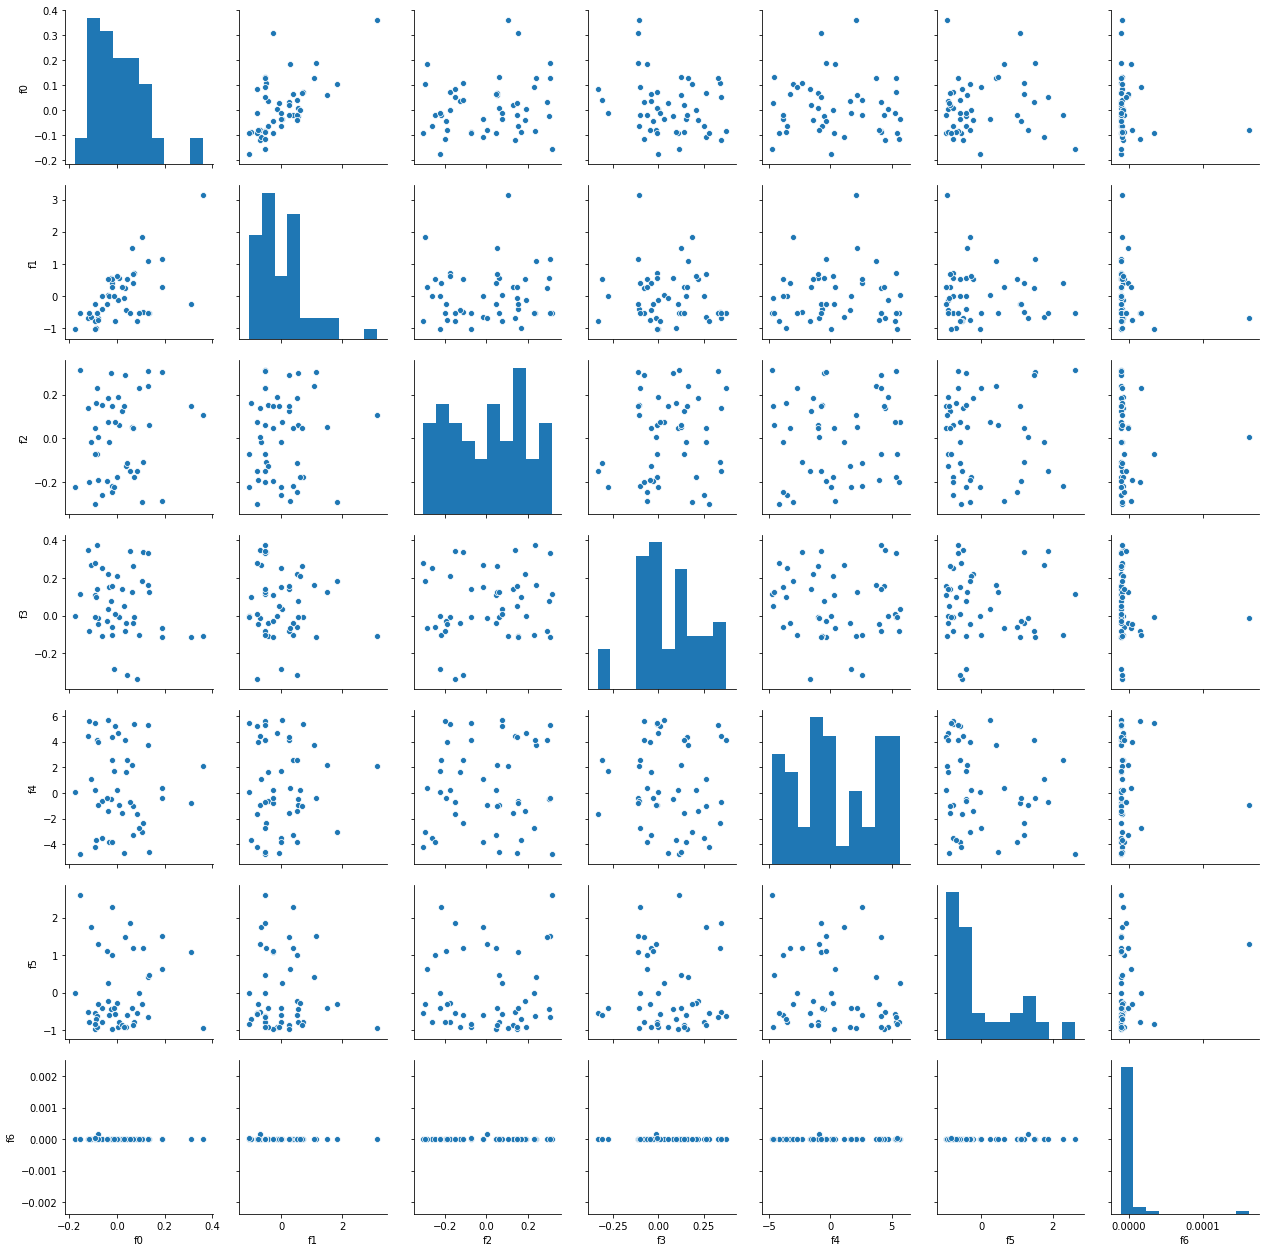

In [14]:
sns.pairplot(df)

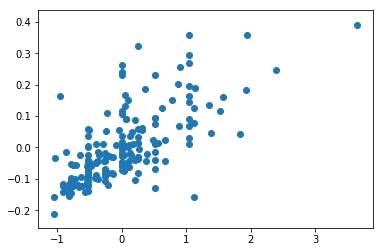

In [15]:
plt.scatter(train['f1'], train['f0'])

## Реализация градиентного спуска

#### 5. [4 балла] Реализуйте модель линейной регрессии для функции потерь Huber loss, обучаемую градиентным спуском:

$$
L_\delta(a,y)=
\begin{cases}
 \frac{1}{2}(y - a)^2,                   & |y - a| \le \delta, \\
 \delta\, |y - a| - \frac{1}{2}\delta^2 & \textrm{иначе.}
\end{cases}
$$

Все вычисления должны быть векторизованы, циклы средствами python допускается использовать только для итераций градиентного спуска. В качестве критерия останова необходимо использовать (одновременно):

* проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
* достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).

Необходимо реализовать метод полного и стохастического градиентных спусков, а также поддержать метод momentum при помощи параметра `alpha` (способ оценивания градиента должен задаваться при помощи параметра `gd_type`).

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту).

Инициализировать веса можно случайным образом или нулевым вектором. Ниже приведён шаблон класса, который должен содержать код реализации модели.

__Python-файл с реализованным классом необходимо сдать на проверку в [Яндекс.Контест](https://contest.yandex.ru/contest/9247/)__

Укажите ссылку на посылку (run-report):

In [0]:
from sklearn.base import BaseEstimator
import numpy.linalg as la
import numpy as np


class HuberReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='stochastic', 
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3, eta=1e-2):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0 
        self.alpha = alpha
        self.w = np.zeros(1)
        self.eta = eta
        self.loss_history = None
    
    def calc_loss(self, X, y):
        if la.norm(y - np.dot(X,self.w)) <= self.delta:
            return 0.5 * la.norm(y -np.dot(X,self.w))
        else:
            return self.delta*la.norm((y - np.dot(X,self.w) - 0.5*self.delta) , ord = 1)
    
    def calc_gradient(self, X, y):
        step_size_0 = 0.045
        self.w = np.zeros(X.shape[1])
        if self.gd_type == 'full':
            w_mem = self.w.copy()
            h = np.zeros(X.shape[1])
            for i in range(self.max_iter):
                step_size = step_size_0 / ((i+1)**0.51)
                if (la.norm(y - np.dot(X,self.w))) <= self.delta:
                    grad = np.dot(X.T, (np.dot(X,self.w) - y)) / y.shape[0]
                    self.w -=h
                else:
                    grad =  self.delta *np.dot(X.T, np.sign(np.dot(X,self.w) - y))/ y.shape[0]
                    self.w -= h
                self.loss_history.append(self.calc_loss(X,y))
                h = self.alpha * h + step_size * grad
                if np.abs(la.norm(w_mem) - la.norm(self.w)) < self.tolerance and i != 0:
                    break
            return self.w

        if self.gd_type == 'stochastic':
            batch_size = 10
            if X.shape[0] < 10:
                print('X lenght < 10 !!!')
                return None
            w_mem = self.w.copy()
            h = np.zeros(X.shape[1])
            for i in range(self.max_iter):
                sample = np.random.randint(X.shape[0], size=batch_size)                
                step_size = step_size_0 / ((i+1)**0.51)
                if la.norm(y.iloc[sample] - np.dot(X.iloc[sample],self.w)) <= self.delta:
                    grad = np.dot(X.iloc[sample].T, (y.iloc[sample] - np.dot(X.iloc[sample],
                                                                             self.w)))/y.shape[0]
                    self.w -= h
                else:
                    grad =  self.delta *np.dot(X.iloc[sample].T,
                                               np.sign(y.iloc[sample] - np.dot(X.iloc[sample],
                                                                               self.w)))/y.shape[0]
                    self.w -= h
                h = self.alpha * h + step_size * grad
                self.loss_history.append(self.calc_loss(X.iloc[sample],y.iloc[sample]))
                if  la.norm(w_mem - self.w) < self.tolerance and i != 0: 
                    print("tolerance break")
        return self.w
        
    def fit(self, X, y):
        self.loss_history = []
        self.calc_gradient(X,y)
        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return np.dot(X,self.w)
        
    def score(self, X, y):
        return (1 - ((y - np.dot(X,self.w))**2).sum()/((y - np.mean(y))**2).sum())

In [17]:
hubreg = HuberReg(gd_type='full')
hubreg.fit(train,train_y)
hubreg.w

array([1.05282889e-01, 9.22339766e-01, 3.35558075e-03, 1.04998420e-02,
       9.83577579e-04, 1.32238569e-02, 2.44108885e-06])

In [18]:
hubreg.score(test, test_y)

0.9946321952495425

#### 6. [1.5 балла] Обучите и провалидируйте модель на тех же данных, сравните качество с предыдущими методами. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Согласуется ли оно с вашими ожиданиями?

In [0]:
from sklearn.model_selection import GridSearchCV
params = {'max_iter': np.arange(800, 1200, 50),
         'alpha':np.arange(0.8,2,0.1)}
grid = GridSearchCV(hubreg, params, cv = 2)

In [20]:
%%time
grid.fit(train, train_y)

/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:2477: RuntimeWarning: overflow encountered in reduce
  return add.reduce(abs(x), axis=axis, keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:764: RuntimeWarning: overflow encountered in square
  arra

CPU times: user 4min 48s, sys: 423 ms, total: 4min 48s
Wall time: 4min 47s


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=HuberReg(alpha=0.001, delta=1.0, eta=0.01,
                                gd_type='full', max_iter=1000, tolerance=0.0001,
                                w0=None),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'max_iter': array([ 800,  850,  900,  950, 1000, 1050, 1100, 1150])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
grid.best_estimator_

HuberReg(alpha=1.8999999999999997, delta=1.0, eta=0.01, gd_type='full',
         max_iter=1150, tolerance=0.0001, w0=None)

#### 7. [1.5 балла] Постройте графики (на одной и той же картинке) зависимости величины функции потерь от номера итерации для полного, стохастического градиентного спусков. Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.

Не забывайте о том, что должны из себя представлять *красивые* графики!

In [69]:
full = HuberReg(alpha = 1.9, gd_type = 'full')
full.fit(train, train_y)
stochastic = HuberReg(alpha = 1.9, gd_type = 'stochastic')
stochastic.fit(train, train_y)

HuberReg(alpha=1.9, delta=1.0, eta=0.01, gd_type='stochastic', max_iter=1000,
         tolerance=0.0001, w0=None)

Text(0.5, 0, 'Iteration')

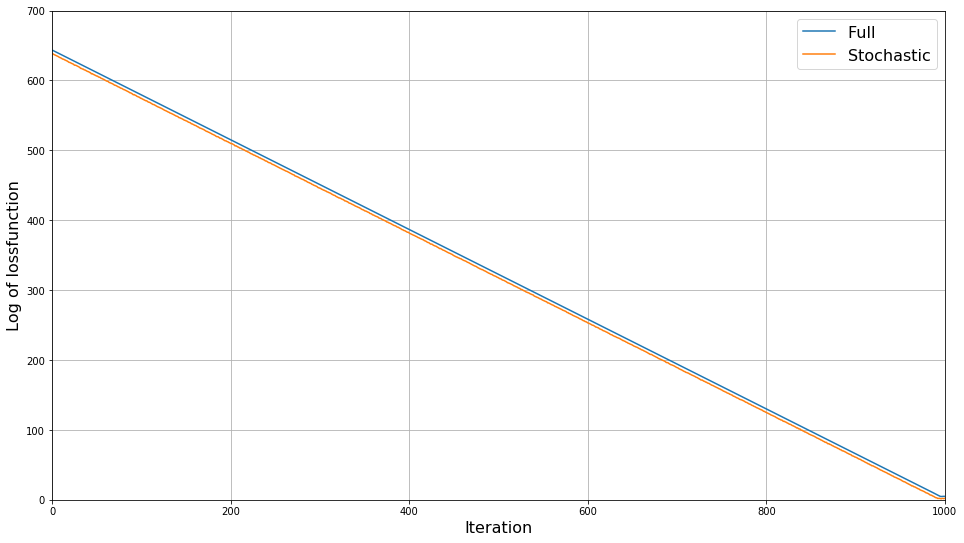

In [70]:
plt.figure(figsize=(16,9))
plt.plot(np.flip(np.arange(1,1001)), np.log(full.loss_history))
plt.plot(np.flip(np.arange(1,1001)), np.log(stochastic.loss_history))
plt.legend(['Full', 'Stochastic'], fontsize = 16)
plt.grid()
plt.xlim(0,1000)
plt.ylim(0,700)
plt.ylabel('Log of lossfunction',fontsize = 16)
plt.xlabel('Iteration', fontsize = 16)